In [1]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

In [16]:
import matplotlib.pyplot as plt

diy.txt

In [7]:
# Загрузка данных из файла diy.txt
diy_data = pd.read_csv('/content/drive/MyDrive/diy.txt', sep=',')
diy_data

ClientID  Recency  Frequency  Monetary_Q  Monetary_A
0      client13166      682          2          23        2705
1       client1239       35         43         219       42161
2      client30041      190         25         133       16057
3      client36276      289          4          12        4614
4      client14136      217          6          36       35870
...            ...      ...        ...         ...         ...
42741  client35593        1          1           3       12797
42742  client22822        1          1           4         536
42743  client23138        1          1          33        6269
42744  client32589        1          1          46       12372
42745  client25258        1          1           5         945

[42746 rows x 5 columns]

In [8]:
# Фильтрация данных: Frequency > 1
diy_data = diy_data[diy_data['Frequency'] > 1]

In [9]:
# Выбор признаков 'Frequency' и 'Monetary_A'
X_diy = diy_data[['Frequency', 'Monetary_A']]

In [10]:
# --- LOF для diy.txt ---
# Создание модели LOF
lof = LocalOutlierFactor()

In [11]:
# Предсказание аномалий
y_pred_lof = lof.fit_predict(X_diy)

In [12]:
# Выделение аномалий
anomalies_lof = X_diy[y_pred_lof == -1]

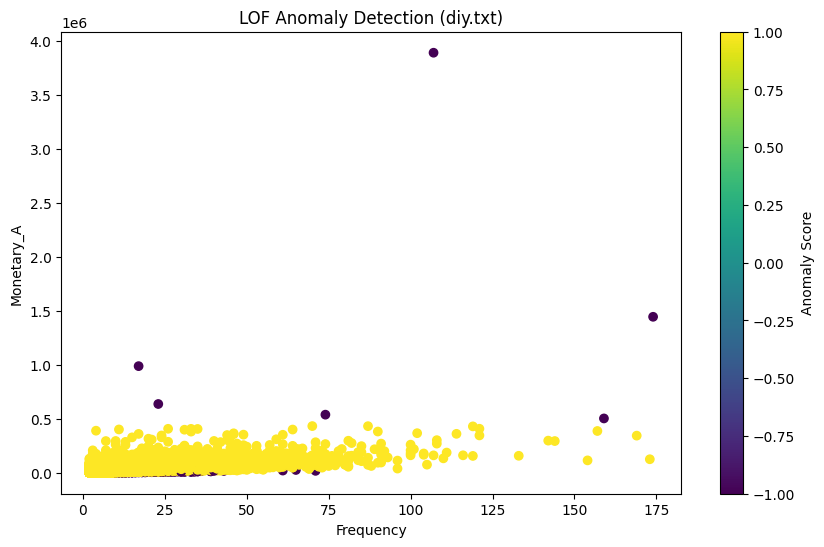

In [17]:
# --- Визуализация LOF для diy.txt ---
plt.figure(figsize=(10, 6))
plt.scatter(X_diy['Frequency'], X_diy['Monetary_A'], c=y_pred_lof, cmap='viridis')
plt.title('LOF Anomaly Detection (diy.txt)')
plt.xlabel('Frequency')
plt.ylabel('Monetary_A')
plt.colorbar(label='Anomaly Score')
plt.show()

Цвет каждой точки на графике отражает ее оценку аномальности. Синие точки - нормальные объекты, желтые/зеленые - аномалии.
Для diy.txt выбраны признаки 'Frequency' и 'Monetary_A'.

In [13]:
# --- Isolation Forest для diy.txt ---
# Создание модели Isolation Forest
isf = IsolationForest()

In [14]:
# Предсказание аномалий
y_pred_isf = isf.fit_predict(X_diy)

In [15]:
# Выделение аномалий
anomalies_isf = X_diy[y_pred_isf == -1]

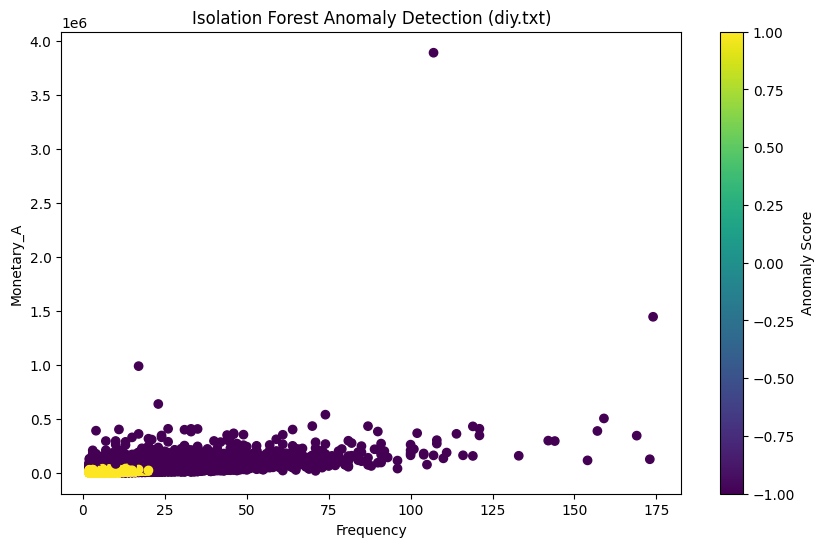

In [18]:
# --- Визуализация Isolation Forest для diy.txt ---
plt.figure(figsize=(10, 6))
plt.scatter(X_diy['Frequency'], X_diy['Monetary_A'], c=y_pred_isf, cmap='viridis')
plt.title('Isolation Forest Anomaly Detection (diy.txt)')
plt.xlabel('Frequency')
plt.ylabel('Monetary_A')
plt.colorbar(label='Anomaly Score')
plt.show()

Цвет каждой точки на графике отражает ее оценку аномальности. Синие точки - нормальные объекты, желтые/зеленые - аномалии.
Для diy.txt выбраны признаки 'Frequency' и 'Monetary_A'

banks.txt

In [24]:
# Загрузка данных из файла banks.txt
try:
  banks_data = pd.read_csv('/content/drive/MyDrive/banks.txt', sep=',', encoding='utf-8')
except UnicodeDecodeError:
  banks_data = pd.read_csv('/content/drive/MyDrive/banks.txt', sep=',', encoding='cp1251')
banks_data

Bank  Assents  OwnCapital  IndFunds  NBSLoans  IndLoans
0          «Авангард»   122109       20440     35443     32728      3319
1             «Аверс»   110741       24410     34918     13613      4924
2             «Агора»     1114         356       274       351       206
3    «Агропромкредит»    18774        2332     12047      6484       903
4           «Агророс»     7917        1157      3564      1909       492
..                ...      ...         ...       ...       ...       ...
366      Ю БИ ЭС Банк     7117        4164         0        43         0
367     Юг-Инвестбанк    12504        1431      7407      6637      2238
368               ЮМК     5024        2117         0      2585       235
369    Юникредит-банк  1315550      197369    267400    665780    170748
370       Яринтербанк     2820         362      1307      1732       221

[371 rows x 6 columns]

In [25]:
# Выбор всех числовых признаков
X_banks = banks_data.iloc[:, 1:]

In [26]:
# --- LOF (Novelty=False) для banks.txt ---
# Создание модели LOF
lof_banks = LocalOutlierFactor(novelty=False)

In [27]:
# Предсказание аномалий
y_pred_banks_lof = lof_banks.fit_predict(X_banks)

In [28]:
# --- Подсчет аномалий ---
num_anomalies = len(y_pred_banks_lof[y_pred_banks_lof == -1])
print(f"Число аномалий (LOF): {num_anomalies}")

Число аномалий (LOF): 56


In [29]:
# --- Фильтрация аномалий ---
filtered_banks_data = X_banks[y_pred_banks_lof != -1]

In [30]:
# --- LOF (Novelty=True) для отфильтрованных данных ---
lof_novelty = LocalOutlierFactor(novelty=True)
lof_novelty.fit(filtered_banks_data)

LocalOutlierFactor(novelty=True)

In [31]:
# --- Предсказание для ранее найденных аномалий ---
anomaly_preds = lof_novelty.predict(X_banks[y_pred_banks_lof == -1])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


In [32]:
# --- Подсчет совпадений ---
matches = len(anomaly_preds[anomaly_preds == -1])
print(f"Число совпадений: {matches}")

Число совпадений: 56


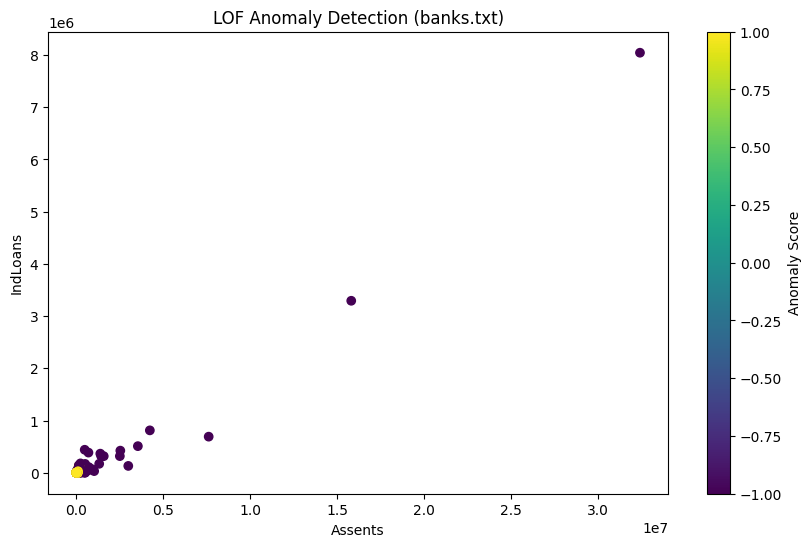

In [34]:
# --- Визуализация LOF для banks.txt ---
plt.figure(figsize=(10, 6))
plt.scatter(X_banks['Assents'], X_banks['IndLoans'], c=y_pred_banks_lof, cmap='viridis')
plt.title('LOF Anomaly Detection (banks.txt)')
plt.xlabel('Assents')
plt.ylabel('IndLoans')
plt.colorbar(label='Anomaly Score')
plt.show()

Цвет каждой точки на графике отражает ее оценку аномальности. Синие точки - нормальные объекты, желтые/зеленые - аномалии.
Для banks.txt выбраны - 'Assents' и 'IndLoans'.

In [33]:
# --- Isolation Forest для banks.txt ---
isf_banks = IsolationForest()
y_pred_banks_isf = isf_banks.fit_predict(X_banks)

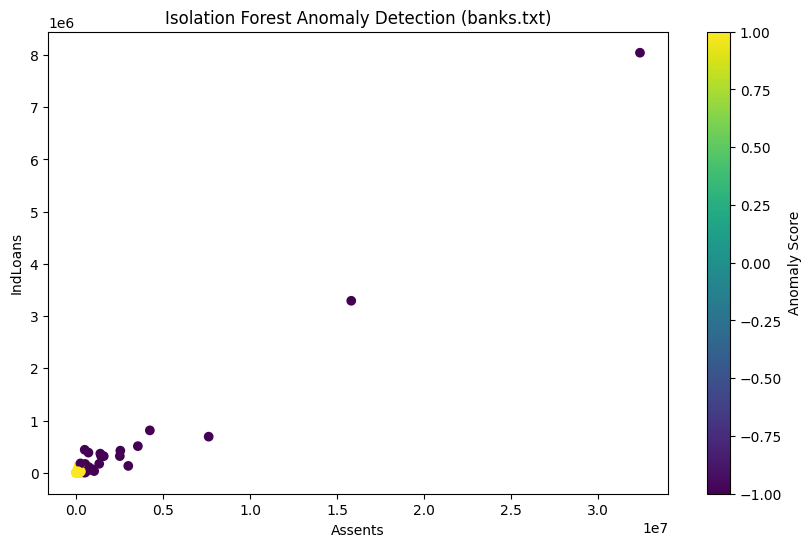

In [35]:
# --- Визуализация Isolation Forest для banks.txt ---
plt.figure(figsize=(10, 6))
plt.scatter(X_banks['Assents'], X_banks['IndLoans'], c=y_pred_banks_isf, cmap='viridis')
plt.title('Isolation Forest Anomaly Detection (banks.txt)')
plt.xlabel('Assents')
plt.ylabel('IndLoans')
plt.colorbar(label='Anomaly Score')
plt.show()

Цвет каждой точки на графике отражает ее оценку аномальности. Синие точки - нормальные объекты, желтые/зеленые - аномалии.
Для banks.txt выбраны признаки - 'Assents' и 'IndLoans'.

Метрики качества:

Accuracy: Не всегда подходит для Anomaly Detection, так как данные часто несбалансированы (мало аномалий).
Precision, Recall, F1-score: Используются для оценки качества классификации (аномалия/не аномалия).
AUC (Area Under Curve): Оценивает качество ранжирования аномалий. Чем выше AUC, тем лучше модель различает аномалии от нормальных объектов.
Average Precision: Также оценивает качество ранжирования аномалий.